## Hypotheses for Statistical Tests

---

### **1. Average Sales by Day of the Week**

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in average sales across different days of the week.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant difference** in average sales across different days of the week.

---

### **2. Rainfall and Average Sales**

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in average sales between rainy days and non-rainy days.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant difference** in average sales between rainy days and non-rainy days.

---

### **3. Snowfall and Average Sales**

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in average sales between snowy days and non-snowy days.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant difference** in average sales between snowy days and non-snowy days.

---

### **4. Holiday and Non-Holiday Sales**

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** between the average sales on non-holiday days and holiday days.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant difference** between the average sales on non-holiday days and holiday days.

---

### **5. Average Sales Across Seasons**

- **Null Hypothesis (H₀)**:  
  There is **no significant difference** in average sales across the seasons (Winter, Spring, Summer, and Fall).

- **Alternative Hypothesis (H₁)**:  
  There is a **significant difference** in average sales across the seasons.

---


## Statistical Test Results

---

### **ANOVA – Average Sales by Day of the Week**

- **Statistic**: 102.3332  
- **p-Value**: \(5.9911 \times 10^{-91}\)  
- **Conclusion**: **Reject the null hypothesis**  
  → There is a **significant difference** in average sales across different days of the week.

---

### **Mann-Whitney U Test – Sales on Rainy vs. Non-Rainy Days**

- **Statistic**: 50960.5000  
- **p-Value**: 0.7983  
- **Conclusion**: **Fail to reject the null hypothesis**  
  → There is **no significant difference** in average sales between rainy and non-rainy days.

---

### **t-test – Sales on Snowy vs. Non-Snowy Days**

- **Statistic**: -2.2459  
- **p-Value**: 0.02895  
- **Conclusion**: **Reject the null hypothesis**  
  → There is a **significant difference** in average sales between snowy and non-snowy days.

---

### **Mann-Whitney U Test – Sales on Holidays vs. Non-Holidays**

- **Statistic**: 3207.0000  
- **p-Value**: 0.02177  
- **Conclusion**: **Reject the null hypothesis**  
  → There is a **significant difference** in average sales between holidays and non-holidays.

---

### **Kruskal-Wallis Test – Sales Across Seasons**

- **Statistic**: 7.2750  
- **p-Value**: 0.06363  
- **Conclusion**: **Fail to reject the null hypothesis**  
  → There is **no significant difference** in average sales across the seasons.


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, f_oneway, mannwhitneyu, ttest_ind, kruskal
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [3]:
# Load the config.yaml file
with open("../config.yaml", "r") as file:
    config = yaml.safe_load(file)

In [7]:
# Get the path to the clean data
clean_data_path = config['output_data']['cleaned_merged_climate_sales']

# Load the clean data
test_df = pd.read_csv(clean_data_path)

# Inspect the data
print(test_df.head())

         date        day  gross_sales  returns  discounts_comps  net_sales  \
0  2023-02-01  Wednesday       919.07      0.0           -33.35     885.72   
1  2023-02-02   Thursday      1463.52      0.0           -20.61    1442.91   
2  2023-02-03     Friday      1051.04      0.0            -9.60    1041.44   
3  2023-02-04   Saturday      2243.72      0.0           -12.43    2231.29   
4  2023-02-05     Sunday      1405.99      0.0           -25.12    1380.87   

   gift_card_sales     tax     tip  refunds_by_amount  ...  total_precip_mm  \
0              0.0   84.44   42.35                0.0  ...              0.0   
1              0.0  108.76   72.70                0.0  ...              0.0   
2              0.0   93.65   49.94                0.0  ...              0.3   
3              0.0  176.67  186.98                0.0  ...              0.0   
4              0.0   85.04   77.20                0.0  ...              0.0   

   total_snow_mm  holiday_name  is_holiday  is_holiday_p

In [10]:
# Ensure 'date' column is in datetime format
test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')

In [11]:
# Function to perform Shapiro-Wilk test and visualize distribution
def check_distribution(data, title):
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {title}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='green')
    plt.title(f'Boxplot of {title}')
    
    plt.show()
    
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data.dropna())
    print(f"Shapiro-Wilk Test for {title}:")
    print(f"Test Statistic = {stat:.4f}, p-Value = {p_value:.4f}")
    if p_value > 0.05:
        print("Result: Data is likely normally distributed.\n")
    else:
        print("Result: Data is likely not normally distributed.\n")


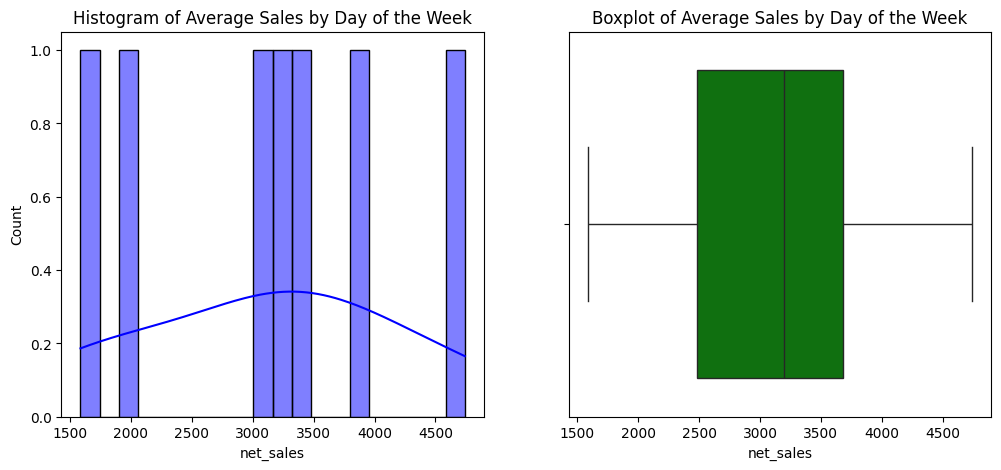

Shapiro-Wilk Test for Average Sales by Day of the Week:
Test Statistic = 0.9679, p-Value = 0.8828
Result: Data is likely normally distributed.



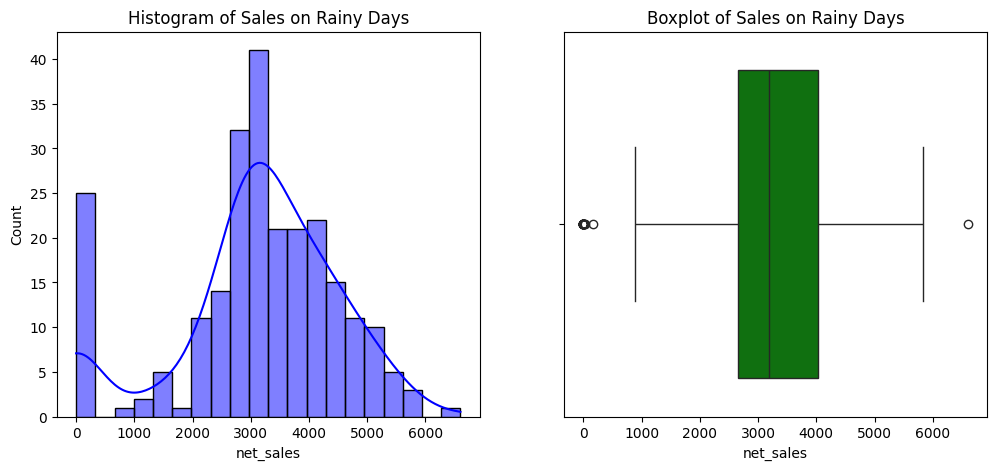

Shapiro-Wilk Test for Sales on Rainy Days:
Test Statistic = 0.9276, p-Value = 0.0000
Result: Data is likely not normally distributed.



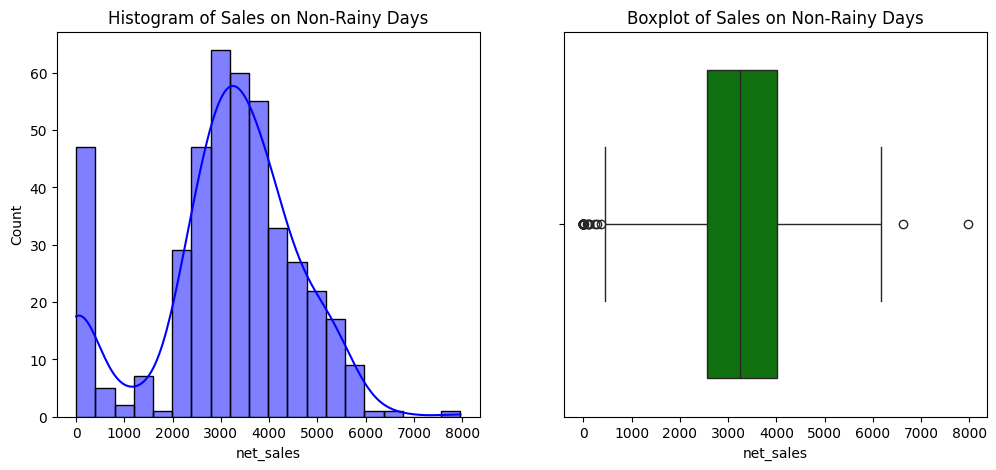

Shapiro-Wilk Test for Sales on Non-Rainy Days:
Test Statistic = 0.9354, p-Value = 0.0000
Result: Data is likely not normally distributed.



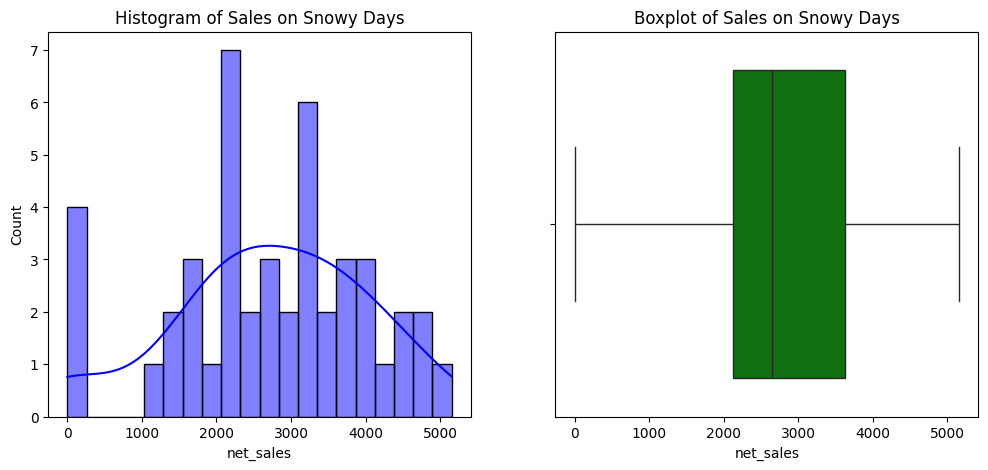

Shapiro-Wilk Test for Sales on Snowy Days:
Test Statistic = 0.9649, p-Value = 0.1875
Result: Data is likely normally distributed.



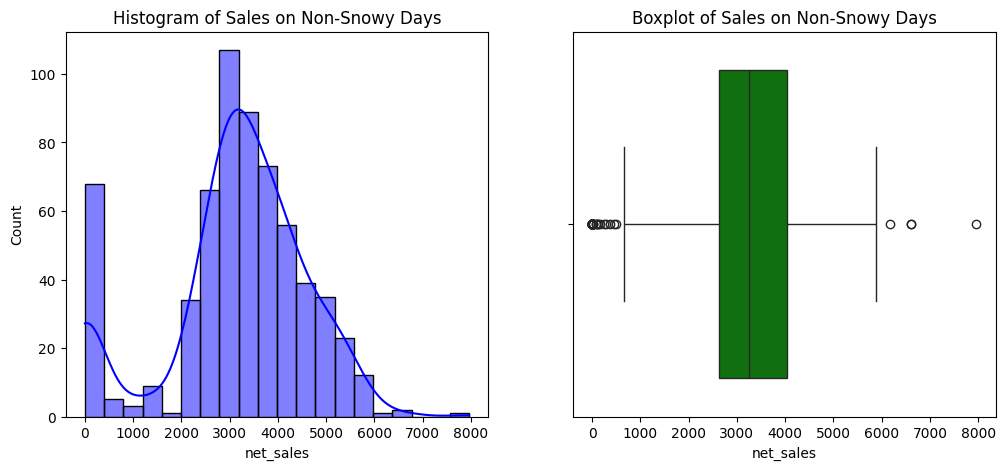

Shapiro-Wilk Test for Sales on Non-Snowy Days:
Test Statistic = 0.9280, p-Value = 0.0000
Result: Data is likely not normally distributed.



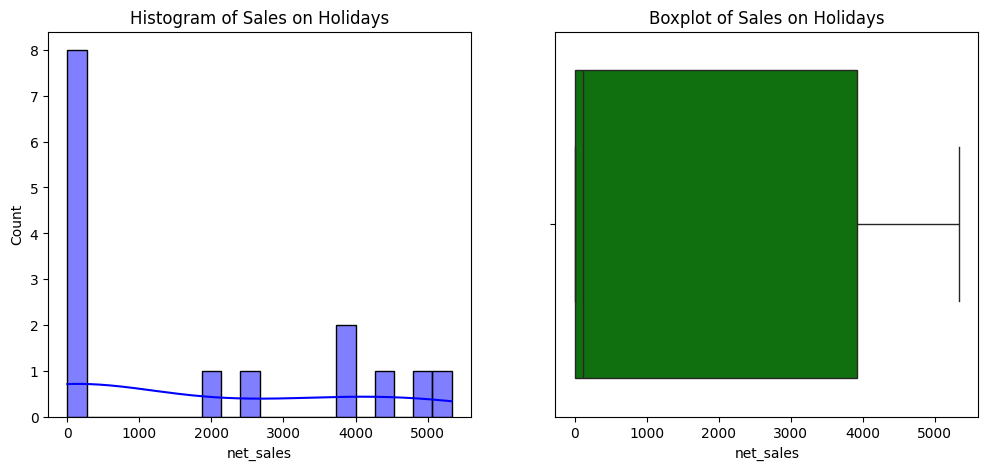

Shapiro-Wilk Test for Sales on Holidays:
Test Statistic = 0.7753, p-Value = 0.0018
Result: Data is likely not normally distributed.



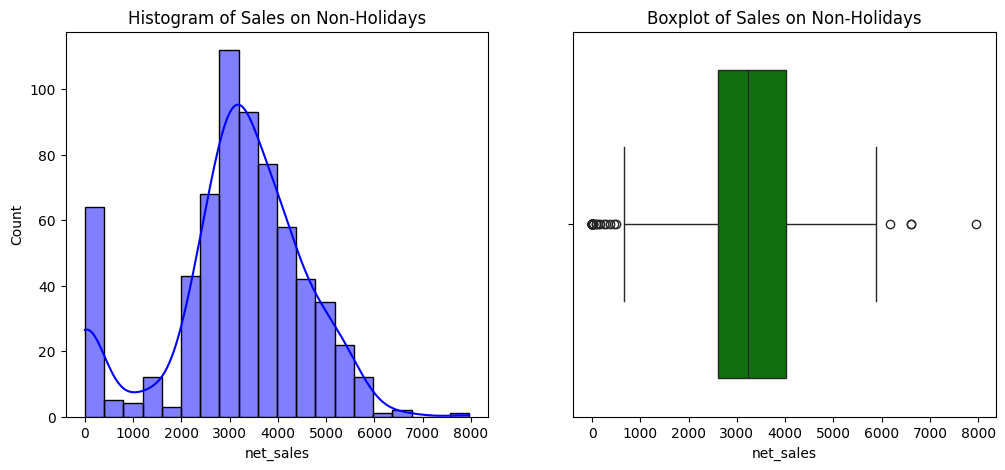

Shapiro-Wilk Test for Sales on Non-Holidays:
Test Statistic = 0.9362, p-Value = 0.0000
Result: Data is likely not normally distributed.



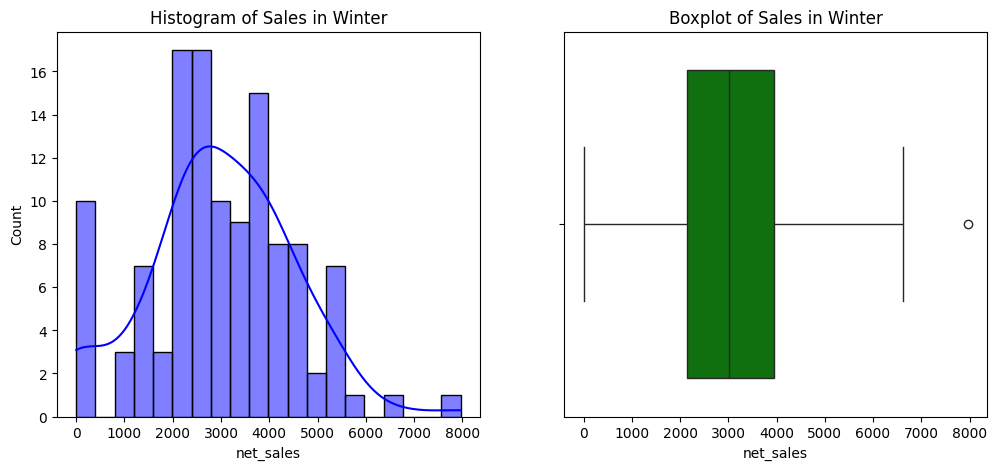

Shapiro-Wilk Test for Sales in Winter:
Test Statistic = 0.9770, p-Value = 0.0390
Result: Data is likely not normally distributed.



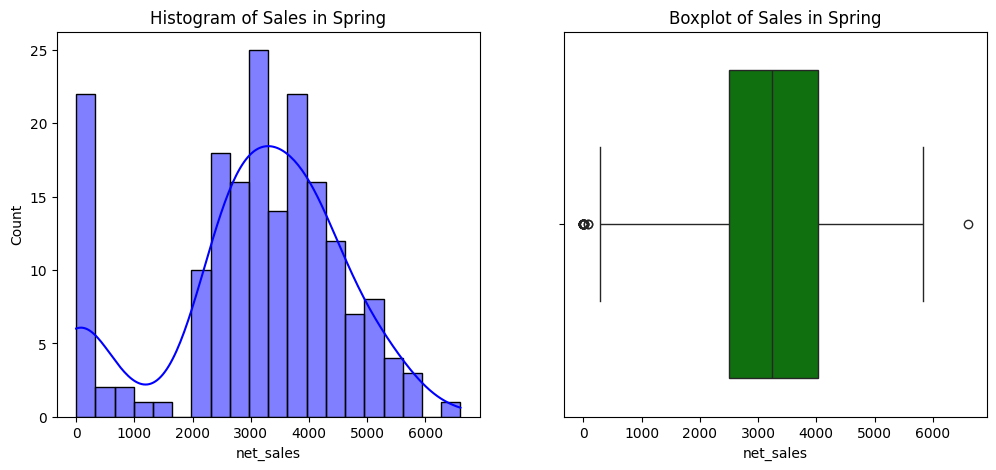

Shapiro-Wilk Test for Sales in Spring:
Test Statistic = 0.9269, p-Value = 0.0000
Result: Data is likely not normally distributed.



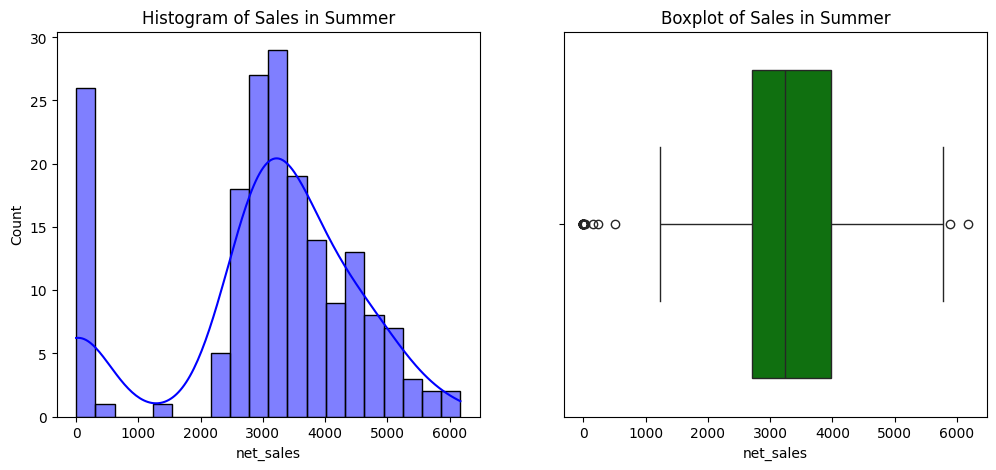

Shapiro-Wilk Test for Sales in Summer:
Test Statistic = 0.8888, p-Value = 0.0000
Result: Data is likely not normally distributed.



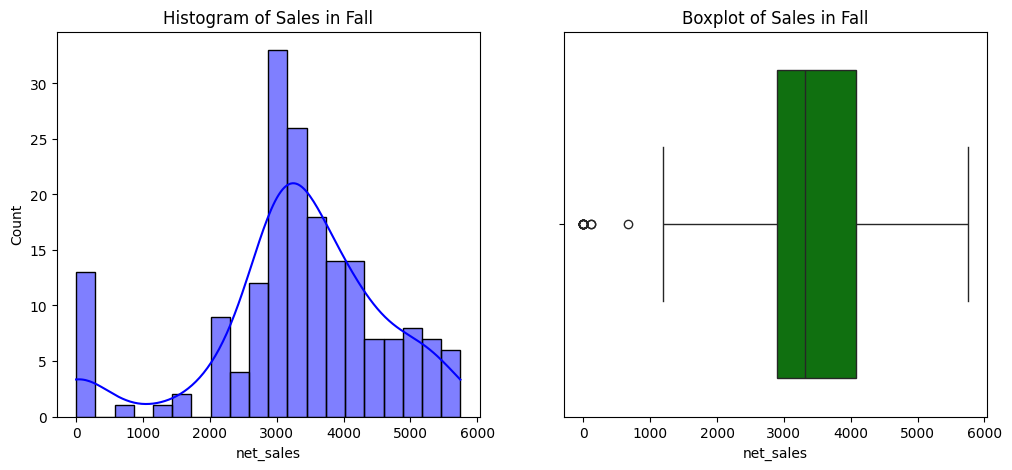

Shapiro-Wilk Test for Sales in Fall:
Test Statistic = 0.9167, p-Value = 0.0000
Result: Data is likely not normally distributed.



In [12]:
# 1. Sales by Day of the Week
sales_by_day = test_df.groupby(test_df['date'].dt.day_name())['net_sales'].mean()
check_distribution(sales_by_day, 'Average Sales by Day of the Week')

# 2. Sales on Rainy vs. Non-Rainy Days
rainy_days_sales = test_df[test_df['total_rain_mm'] > 0]['net_sales']
non_rainy_days_sales = test_df[test_df['total_rain_mm'] == 0]['net_sales']
check_distribution(rainy_days_sales, 'Sales on Rainy Days')
check_distribution(non_rainy_days_sales, 'Sales on Non-Rainy Days')

# 3. Sales on Snowy vs. Non-Snowy Days
snowy_days_sales = test_df[test_df['total_snow_mm'] > 0]['net_sales']
non_snowy_days_sales = test_df[test_df['total_snow_mm'] == 0]['net_sales']
check_distribution(snowy_days_sales, 'Sales on Snowy Days')
check_distribution(non_snowy_days_sales, 'Sales on Non-Snowy Days')

# 4. Sales on Holiday vs. Non-Holiday Days
holiday_sales = test_df[test_df['is_holiday'] == 1]['net_sales']
non_holiday_sales = test_df[test_df['is_holiday'] == 0]['net_sales']
check_distribution(holiday_sales, 'Sales on Holidays')
check_distribution(non_holiday_sales, 'Sales on Non-Holidays')

# 5. Sales by Season
winter_sales = test_df[test_df['season'] == 'Winter']['net_sales']
spring_sales = test_df[test_df['season'] == 'Spring']['net_sales']
summer_sales = test_df[test_df['season'] == 'Summer']['net_sales']
fall_sales = test_df[test_df['season'] == 'Fall']['net_sales']
check_distribution(winter_sales, 'Sales in Winter')
check_distribution(spring_sales, 'Sales in Spring')
check_distribution(summer_sales, 'Sales in Summer')
check_distribution(fall_sales, 'Sales in Fall')

In [16]:
# 1. Average Sales by Day of the Week - ANOVA
days_of_week_sales = [group['net_sales'].values for name, group in test_df.groupby(test_df['date'].dt.day_name())]
anova_result = f_oneway(*days_of_week_sales)

# 2. Sales on Rainy vs. Non-Rainy Days - Mann-Whitney U Test
rainy_days_sales = test_df[test_df['total_rain_mm'] > 0]['net_sales']
non_rainy_days_sales = test_df[test_df['total_rain_mm'] == 0]['net_sales']
mann_whitney_rain = mannwhitneyu(rainy_days_sales, non_rainy_days_sales, alternative='two-sided')

# 3. Sales on Snowy vs. Non-Snowy Days - t-test
snowy_days_sales = test_df[test_df['total_snow_mm'] > 0]['net_sales']
non_snowy_days_sales = test_df[test_df['total_snow_mm'] == 0]['net_sales']
t_test_snow = ttest_ind(snowy_days_sales, non_snowy_days_sales, equal_var=False)

# 4. Sales on Holidays vs. Non-Holidays - Mann-Whitney U Test
holiday_sales = test_df[test_df['is_holiday'] == 1]['net_sales']
non_holiday_sales = test_df[test_df['is_holiday'] == 0]['net_sales']
mann_whitney_holiday = mannwhitneyu(holiday_sales, non_holiday_sales, alternative='two-sided')

# 5. Sales Across Seasons - Kruskal-Wallis Test
winter_sales = test_df[test_df['season'] == 'Winter']['net_sales']
spring_sales = test_df[test_df['season'] == 'Spring']['net_sales']
summer_sales = test_df[test_df['season'] == 'Summer']['net_sales']
fall_sales = test_df[test_df['season'] == 'Fall']['net_sales']
kruskal_seasons = kruskal(winter_sales, spring_sales, summer_sales, fall_sales)

In [17]:
# Print formatted results with interpretation based on p-value
def interpret_result(test_name, result):
    decision = "Reject the null hypothesis" if result.pvalue < 0.05 else "Fail to reject the null hypothesis"
    print(f"{test_name}:")
    print(f"  Statistic = {result.statistic:.4f}")
    print(f"  p-Value = {result.pvalue:.4e}")
    print(f"  Conclusion: {decision}\n")

# Display results for each test
interpret_result("ANOVA - Average Sales by Day of the Week", anova_result)
interpret_result("Mann-Whitney U Test - Sales on Rainy vs. Non-Rainy Days", mann_whitney_rain)
interpret_result("t-test - Sales on Snowy vs. Non-Snowy Days", t_test_snow)
interpret_result("Mann-Whitney U Test - Sales on Holidays vs. Non-Holidays", mann_whitney_holiday)
interpret_result("Kruskal-Wallis Test - Sales Across Seasons", kruskal_seasons)

ANOVA - Average Sales by Day of the Week:
  Statistic = 102.3332
  p-Value = 5.9911e-91
  Conclusion: Reject the null hypothesis

Mann-Whitney U Test - Sales on Rainy vs. Non-Rainy Days:
  Statistic = 50960.5000
  p-Value = 7.9832e-01
  Conclusion: Fail to reject the null hypothesis

t-test - Sales on Snowy vs. Non-Snowy Days:
  Statistic = -2.2459
  p-Value = 2.8955e-02
  Conclusion: Reject the null hypothesis

Mann-Whitney U Test - Sales on Holidays vs. Non-Holidays:
  Statistic = 3207.0000
  p-Value = 2.1767e-02
  Conclusion: Reject the null hypothesis

Kruskal-Wallis Test - Sales Across Seasons:
  Statistic = 7.2750
  p-Value = 6.3629e-02
  Conclusion: Fail to reject the null hypothesis

